# Using coherent measures of risk in portfolio optimization
Armando W. Gutiérrez

Based on the paper:

**Risk-adjusted probability measures in portfolio optimization with coherent measures of risk.** 

N. Miller and A. Ruszczyński.

**Mean-risk portfolio model**

$R$ portfolio return. Performance: risk($R$), mean($R$)

Efficient portfolio: 
- given mean($R$), min risk($R$)
- given risk($R$), max mean($R$)

**Portfolio optimization model**
        
   - $n\times N$ matrix of returns $R=(r_{ij})$, where $n$ assets, $N$ trading days
   - coherent measure of risk $\rho:\mathbb{R}^N\to\mathbb{R}$
   - $\Delta^n =\{z\in\mathbb{R}_{\geq 0}^n\;:
       \;\sum_{i=1}^{n}z_i = 1\}$

**Portfolio optimization model**

$$
    \min_{z\in\Delta^n}\;\rho(R^\intercal z) 
$$

In [90]:
#import Pkg; 

# Preparing the data

## Making a data frame that contains all tickers/constituents in the s&p500 

In [91]:
#Pkg.add("CSV")
#Pkg.add("DataFrames")
using CSV
using DataFrames

Tickers = DataFrame(
        CSV.File("SP500tickers.csv"));

In [92]:
Tickers

Row,# Symbol
,String7
1,MMM
2,AOS
3,ABT
4,ABBV
5,ACN
6,ADM
7,ADBE
8,ADP
9,AES


## Selecting some tickers randomly from all the s&p500 tickers

In [93]:
#Pkg.add("StatsBase");
using StatsBase
 
n_init = 100; 

sTickers = sample(axes(Tickers, 1), n_init; 
        replace = false, ordered = true);

Assets = Tickers[sTickers,1];

In [94]:
Assets

100-element Vector{String7}:
 "ACN"
 "ABNB"
 "GOOG"
 "AMP"
 "AME"
 "ANSS"
 "AMAT"
 "APTV"
 "ATO"
 "BAX"
 "BDX"
 "BBY"
 "BLK"
 ⋮
 "TRGP"
 "TSLA"
 "TXN"
 "TSCO"
 "TDG"
 "TFC"
 "TSN"
 "ULTA"
 "WBD"
 "WM"
 "WDC"
 "WYNN"

## Getting daily stock prices from Yahoo! Finance

In [95]:
#Pkg.add("YFinance");
using YFinance

data = get_prices.(Assets,
        startdt="1993-11-21",
        enddt="2023-11-21",
        throw_error=true);

In [96]:
data = data |> DataFrame
data[!,["ticker","open","close","adjclose"]]

Row,ticker,open,close,adjclose
,String7,Array…,Array…,Array…
1,ACN,"[10.8772, 10.8412, 10.8052, 10.7692, 10.5891, 10.7692, 10.4522, 10.445, 10.5963, 10.8052 … 313.0, 316.87, 317.28, 315.54, 316.01, 319.82, 319.62, 327.1, 327.66, 326.46]","[15.17, 15.01, 15.0, 14.86, 14.95, 14.5, 14.51, 14.7, 14.96, 15.5 … 315.19, 317.82, 314.22, 319.69, 315.63, 320.49, 325.5, 327.32, 327.83, 330.9]","[10.9276, 10.8124, 10.8052, 10.7043, 10.7692, 10.445, 10.4522, 10.5891, 10.7764, 11.1654 … 315.19, 317.82, 314.22, 319.69, 315.63, 320.49, 325.5, 327.32, 327.83, 330.9]"
2,ABNB,"[146.0, 146.55, 135.0, 126.69, 125.83, 143.0, 150.45, 155.31, 170.0, 162.814 … 118.25, 119.43, 118.35, 114.525, 117.51, 122.355, 128.0, 127.12, 126.65, 127.4]","[144.71, 139.25, 130.0, 124.8, 137.99, 147.05, 157.3, 163.02, 163.19, 158.01 … 121.08, 117.66, 115.52, 118.15, 119.15, 126.68, 128.35, 126.28, 127.15, 129.7]","[144.71, 139.25, 130.0, 124.8, 137.99, 147.05, 157.3, 163.02, 163.19, 158.01 … 121.08, 117.66, 115.52, 118.15, 119.15, 126.68, 128.35, 126.28, 127.15, 129.7]"
3,GOOG,"[2.49066, 2.51582, 2.75841, 2.77062, 2.6142, 2.61395, 2.69241, 2.62217, 2.54795, 2.55791 … 131.98, 132.36, 133.36, 131.53, 133.36, 135.65, 136.64, 136.96, 137.82, 135.5]","[2.49913, 2.69764, 2.72479, 2.61196, 2.6401, 2.68768, 2.64384, 2.54073, 2.54969, 2.49689 … 132.4, 133.26, 131.69, 134.06, 133.64, 135.43, 136.38, 138.7, 136.94, 137.92]","[2.49913, 2.69764, 2.72479, 2.61196, 2.6401, 2.68768, 2.64384, 2.54073, 2.54969, 2.49689 … 132.4, 133.26, 131.69, 134.06, 133.64, 135.43, 136.38, 138.7, 136.94, 137.92]"
4,AMP,"[26.1336, 25.4325, 25.1576, 25.1576, 25.1576, 25.0201, 25.57, 25.948, 25.948, 25.5975 … 332.95, 332.87, 334.66, 333.51, 334.45, 340.54, 343.99, 343.6, 346.6, 345.98]","[37.01, 36.6, 36.7, 36.7, 36.4, 37.2, 37.68, 37.75, 37.25, 37.0 … 332.95, 332.34, 331.84, 336.36, 335.13, 342.44, 343.47, 344.2, 347.83, 349.48]","[25.4394, 25.1576, 25.2263, 25.2263, 25.0201, 25.57, 25.8999, 25.948, 25.6044, 25.4325 … 332.95, 332.34, 331.84, 336.36, 335.13, 342.44, 343.47, 344.2, 347.83, 349.48]"
5,AME,"[1.28082, 1.26626, 1.29537, 1.30993, 1.32448, 1.36815, 1.44092, 1.3827, 1.36815, 1.36054 … 142.49, 147.15, 148.87, 148.8, 150.27, 153.32, 154.68, 153.58, 154.57, 155.85]","[1.61111, 1.62963, 1.66667, 1.66667, 1.74074, 1.85185, 1.75926, 1.74074, 1.74074, 1.72222 … 146.5, 147.9, 147.46, 150.8, 151.38, 154.73, 153.1, 153.97, 155.66, 154.81]","[1.26626, 1.28082, 1.30993, 1.30993, 1.36815, 1.45548, 1.3827, 1.36815, 1.36815, 1.36054 … 146.5, 147.9, 147.46, 150.8, 151.38, 154.73, 153.1, 153.97, 155.66, 154.81]"
6,ANSS,"[3.0, 3.03125, 3.0625, 3.21875, 3.1875, 3.1875, 3.25, 3.3125, 3.21875, 3.1875 … 284.16, 283.48, 289.04, 285.75, 290.1, 289.97, 299.24, 299.21, 303.77, 301.05]","[2.96875, 3.0, 3.21875, 3.15625, 3.15625, 3.25, 3.28125, 3.21875, 3.25, 3.40625 … 281.8, 286.94, 284.42, 291.5, 291.0, 297.94, 298.57, 301.66, 299.46, 302.44]","[2.96875, 3.0, 3.21875, 3.15625, 3.15625, 3.25, 3.28125, 3.21875, 3.25, 3.40625 … 281.8, 286.94, 284.42, 291.5, 291.0, 297.94, 298.57, 301.66, 299.46, 302.44]"
7,AMAT,"[1.46318, 1.41709, 1.52078, 1.57839, 1.67056, 1.57839, 1.70512, 1.6936, 1.70512, 1.60143 … 139.7, 142.065, 144.589, 144.879, 148.681, 152.702, 154.638, 155.067, 141.735, 148.561]","[1.875, 2.04688, 2.125, 2.19531, 2.1875, 2.20312, 2.30469, 2.3125, 2.35938, 2.23438 … 141.74, 144.23, 143.17, 150.68, 149.74, 154.08, 155.37, 154.81, 148.59, 152.57]","[1.38253, 1.50926, 1.56687, 1.61871, 1.61295, 1.62447, 1.69936, 1.70512, 1.73969, 1.64752 … 141.436, 143.921, 142.863, 150.357, 149.419, 153.75, 155.037, 154.478, 148.271, 152.243]"
8,APTV,"[16.2777, 16.3543, 16.0862, 15.55, 15.0904, 14.9755, 15.213, 15.3202, 15.4351, 16.0479 … 74.52, 75.9, 74.14, 73.11, 75.58, 77.59, 79.18, 79.75, 79.99, 81.18]","[17.8793, 17.6027, 17.0159, 16.6806, 16.4543, 16.4711, 16.798, 16.7561, 17.4686, 17.4434 … 75.72, 73.96, 72.81, 75.93, 75.43, 79.41, 80.29, 79.15, 81.18, 81.46]","[16.339, 16.0862, 15.55, 15.2436, 15.0368, 15.0521, 15.3508, 15.31

## Checking that the necessary data is complete
Some assets may have missing values in adjusted closing price 

In [97]:
# adding a column length(adjusted closing price) 
data[!,:"length_adjclose"] = [
    length(data[!,"adjclose"][i]) for i in 1:n_init];

# showing number of assets with incomplete data
N_aux = maximum(data[!,:"length_adjclose"]);
count(data[!,"length_adjclose"] .< N_aux)

41

## Setting the data

In [98]:
# selecting assets with full historical data
data = filter(:"length_adjclose" 
        => l -> l == N_aux, data); 

# number of assets in our portfolio
n = size(data,1);

# number of trading days
N = N_aux - 1; 

In [99]:
data[!,["ticker","timestamp","adjclose"]]

Row,ticker,timestamp,adjclose
,String7,Array…,Array…
1,AME,"[DateTime(""1993-11-22T14:30:00""), DateTime(""1993-11-23T14:30:00""), DateTime(""1993-11-24T14:30:00""), DateTime(""1993-11-26T14:30:00""), DateTime(""1993-11-29T14:30:00""), DateTime(""1993-11-30T14:30:00""), DateTime(""1993-12-01T14:30:00""), DateTime(""1993-12-02T14:30:00""), DateTime(""1993-12-03T14:30:00""), DateTime(""1993-12-06T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[1.26626, 1.28082, 1.30993, 1.30993, 1.36815, 1.45548, 1.3827, 1.36815, 1.36815, 1.36054 … 146.5, 147.9, 147.46, 150.8, 151.38, 154.73, 153.1, 153.97, 155.66, 154.81]"
2,AMAT,"[DateTime(""1993-11-22T14:30:00""), DateTime(""1993-11-23T14:30:00""), DateTime(""1993-11-24T14:30:00""), DateTime(""1993-11-26T14:30:00""), DateTime(""1993-11-29T14:30:00""), DateTime(""1993-11-30T14:30:00""), DateTime(""1993-12-01T14:30:00""), DateTime(""1993-12-02T14:30:00""), DateTime(""1993-12-03T14:30:00""), DateTime(""1993-12-06T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[1.38253, 1.50926, 1.56687, 1.61871, 1.61295, 1.62447, 1.69936, 1.70512, 1.73969, 1.64752 … 141.436, 143.921, 142.863, 150.357, 149.419, 153.75, 155.037, 154.478, 148.271, 152.243]"
3,ATO,"[DateTime(""1993-11-22T14:30:00""), DateTime(""1993-11-23T14:30:00""), DateTime(""1993-11-24T14:30:00""), DateTime(""1993-11-26T14:30:00""), DateTime(""1993-11-29T14:30:00""), DateTime(""1993-11-30T14:30:00""), DateTime(""1993-12-01T14:30:00""), DateTime(""1993-12-02T14:30:00""), DateTime(""1993-12-03T14:30:00""), DateTime(""1993-12-06T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[5.75374, 5.62237, 5.70119, 5.72747, 5.70119, 5.75374, 5.78001, 5.78001, 5.72747, 5.72747 … 109.86, 109.27, 111.29, 111.41, 111.12, 114.14, 113.53, 114.05, 113.9, 112.92]"
4,BAX,"[DateTime(""1993-11-22T14:30:00""), DateTime(""1993-11-23T14:30:00""), DateTime(""1993-11-24T14:30:00""), DateTime(""1993-11-26T14:30:00""), DateTime(""1993-11-29T14:30:00""), DateTime(""1993-11-30T14:30:00""), DateTime(""1993-12-01T14:30:00""), DateTime(""1993-12-02T14:30:00""), DateTime(""1993-12-03T14:30:00""), DateTime(""1993-12-06T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:30:00""), DateTime(""2023-11-09T14:30:00""), DateTime(""2023-11-10T14:30:00""), DateTime(""2023-11-13T14:30:00""), DateTime(""2023-11-14T14:30:00""), DateTime(""2023-11-15T14:30:00""), DateTime(""2023-11-16T14:30:00""), DateTime(""2023-11-17T14:30:00""), DateTime(""2023-11-20T14:30:00"")]","[3.09725, 3.16385, 3.13055, 3.1472, 3.09725, 3.1472, 3.1139, 3.14756, 3.09707, 3.02974 … 34.21, 34.05, 32.83, 32.82, 33.71, 34.35, 35.31, 35.45, 35.46, 35.62]"
5,BDX,"[DateTime(""1993-11-22T14:30:00""), DateTime(""1993-11-23T14:30:00""), DateTime(""1993-11-24T14:30:00""), DateTime(""1993-11-26T14:30:00""), DateTime(""1993-11-29T14:30:00""), DateTime(""1993-11-30T14:30:00""), DateTime(""1993-12-01T14:30:00""), DateTime(""1993-12-02T14:30:00""), DateTime(""1993-12-03T14:30:00""), DateTime(""1993-12-06T14:30:00"") … DateTime(""2023-11-07T14:30:00""), DateTime(""2023-11-08T14:3

## Calculating daily returns
$
 \text{daily return} = \log\Big(\frac{\text{today's adjusted closing price}}
             {\text{yesterday's adjusted closing price}}\Big)
$

In [100]:
#Pkg.add("ShiftedArrays")
using ShiftedArrays

r = [zeros(N) for _ in 1:n]; aux1 = data[!,"adjclose"][:];
for i in 1:n
    aux2 = ShiftedArray(aux1[i],1,default=NaN) 
    r_aux = log.(aux1[i]./aux2)
    r[i] = r_aux[2:N_aux]
end
R = transpose(reduce(hcat,r));

In [101]:
DataFrame(Matrix(R),:auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.0114288,0.0224728,0.0,0.0434853,0.0618759,-0.0512933,-0.0105826,0.0,-0.00557627,0.0,0.0317492,0.0103625,-0.0103625,0.0206196,-0.0102572,0.0102572,0.0202029,0.0198022,-0.00985263,0.00985263,0.0,0.0,-0.00985263,-0.00994961,0.00994961,0.00985263,0.0,0.0,0.00975587,0.0,-0.00975587,0.0,0.00975587,-0.00975587,0.0,-0.0198022,0.00994961,0.0,-0.00994961,0.00994961,-0.00994961,-0.0202029,0.0101518,0.0,0.0,0.0,0.0100511,-0.0202029,0.0,-0.0206196,-0.0104711,0.0208335,-0.0208335,-0.010582,0.010582,0.0310907,-0.0310907,0.0208335,0.0102572,-0.0206196,0.0,0.0103625,-0.0103625,-0.0210531,-0.0106961,0.0106961,0.010582,0.0104711,0.0103625,0.0102572,-0.0102572,0.0404097,0.00985263,0.00975587,-0.00975587,-0.0051359,0.0,0.0196089,-0.00975585,-0.00985309,-0.00994903,0.00994903,0.0,0.0,0.0,0.0,0.0,0.0,-0.0404091,0.0204085,-0.0204085,0.0102567,0.0101519,0.0,-0.0204085,0.0,0.0,-0.0103625,0.030771,-0.0101519,⋯
2,0.0877056,0.0374576,0.0325526,-0.00356536,0.00711792,0.0450685,0.00338375,0.0200678,-0.0544351,-0.00701779,-0.0106197,-0.0325526,0.0145991,0.0215061,0.0,-0.0215061,0.0,0.0,0.00722003,-0.0218191,0.0145991,0.0108108,0.0523676,0.0268477,0.00660048,0.00982019,0.00972482,-0.0261455,-0.00664489,0.0263174,-0.013072,-0.00660048,0.0578937,0.0,0.036814,0.0119764,0.00593406,0.00883708,-0.00588189,-0.0299426,0.0269874,0.011765,0.0231229,-0.00286094,-0.0144307,0.0115607,0.00573092,0.00853473,0.0224103,0.0192048,-0.0109295,-0.0741081,0.0291569,0.0558807,0.0,-0.0247606,0.0138311,0.0163495,0.0266682,0.0412428,-0.0204089,0.0153459,0.0201016,-0.0251909,-0.012837,-0.0208884,0.00263489,0.0208339,-0.0583718,0.0242934,0.0026624,0.0105821,-0.0320881,0.0241622,-0.0106664,0.0368459,0.012837,0.0202028,0.00747156,0.02693,-0.00970882,-0.0147422,0.00739806,-0.0173486,-0.0304594,-0.0502084,0.0,-0.0358654,-0.045986,0.045986,0.0111731,0.0851573,-0.0232265,-0.00786401,-0.0266682,0.0266682,-0.0937323,-0.0595414,0.0302139,-0.0180188,⋯
3,-0.023096,0.0139216,0.00459796,-0.00459796,0.00917446,0.00455548,0.0,-0.00913198,0.0,-0.00459796,-0.00461945,0.0,0.0,0.0,-0.00463945,0.0,0.0,-0.00934662,-0.0189574,-0.0144577,-0.0146704,0.0339007,0.0141849,0.0139861,0.0183494,0.00905024,-0.00451468,0.0223722,0.00441454,-0.00884881,0.0,0.00443427,-0.00888838,-0.0044746,0.0044746,-0.0180194,0.00905024,0.00449455,0.0221734,-0.0176988,-0.0225749,0.00455548,-0.00455548,-0.0045765,0.0448501,0.0173921,0.00858382,0.0,0.0,-0.0259759,-0.00881039,-0.0178575,-0.0320391,-0.00466269,0.00930214,0.0,0.0408229,0.0132447,0.0173921,0.0,0.0128478,0.00703358,-0.017242,0.0215059,-0.00426394,0.0,0.00851091,0.0,-0.0127933,-0.00430185,0.0213234,-0.00847516,-0.00854637,-0.00862151,0.025643,0.00840288,0.00417545,0.0,-0.0125783,-0.00422818,0.00422818,-0.0213234,0.00430185,-0.0173169,0.0,-0.00877167,0.0217867,-0.00865767,-0.0309076,-0.041196,-0

## Representation of coherent risk measure
$\rho:\mathbb{R}^N\to\mathbb{R}$ has the form
$$
    \rho(R^\intercal z) = \max_{q\in A}
    \Bigl\{-\sum_{j=1}^{N}q_j\sum_{i=1}^{n}r_{ij}z_i\Bigl\},
$$
where $A$ is a closed convex subset of $\Delta^N$.

To describe $A$ we assume $R$ follows certain probability distribution.


## Assumption : daily returns are equally likely scenarios
$p_j = \text{Prob}(R^\intercal z = \sum_{i=1}^{n}r_{ij}z_i)$ for each trading day $j=1,...,N$

In [102]:
p = (1/N)*ones(N);

## Portfolio optimization model as min-max problem
$$
    \min_{z\in\Delta^n}\max_{q\in A}
    \Bigl\{-\sum_{j=1}^{N}q_j\sum_{i=1}^{n}r_{ij}z_i\Bigl\}
$$

__Optimal solution $(z^*,q^*)$ to this zero-sum game exists due to von Neumann's minmax theorem.__

## Mean-semideviation model

Suppose $\lambda\in[0,1]$. Consider the risk measure 

$$
    \rho(R^\intercal z) = -\mathbb{E}(R^\intercal z) 
        + \lambda\sigma_1(R^\intercal z),
$$

where $\sigma_1(R^\intercal z)=\mathbb{E}
\max\{\mathbb{E}(R^\intercal z)-R^\intercal z, 0\}$

For the given probability distribution $p$, we have

$$
   \rho(R^\intercal z) = -\langle p,R^\intercal z \rangle 
   + \lambda\sum_{j=1}^{N}p_j\max\{\langle p,R^\intercal z \rangle 
   - \langle r_{\cdot j},z \rangle ,0\}
$$
and

$$ A = \{(1-\lambda\sum_{j=1}^{N}g_j)p
+ \lambda g : |g_j|\leq p_j,\;\forall\;j=1,...,N\}$$

## Mean-semideviation model

$$
\begin{align}
 &\min\; -\langle p,R^\intercal z \rangle + \lambda\sum_{j=1}^{N}p_j\max\{\langle p,R^\intercal z \rangle - \langle r_{\cdot j},z \rangle ,0\} \\
 &\text{ s.t.}\quad z\in\mathbb{R}^n, \quad z_i\geq 0\;\forall\; i=1,...,n, \quad \sum_{i=1}^{n}z_i = 1
\end{align}
$$

In [103]:
#Pkg.add("JuMP")
#Pkg.add("HiGHS")
using JuMP; using HiGHS;

m = Model(HiGHS.Optimizer); set_silent(m);
lambda = 0.6;

@variable(m, z[i=1:n] >= 0.0)     
@variable(m, s[j=1:N] >= 0.0) 
@expression(m,auz[k in 1:N],
    sum(p[j]*R[i,j]*z[i] for j in 1:N, i in 1:n) 
    - sum(R[i,k]*z[i] for i in 1:n))

@constraint(m, C[k in 1:N], s[k] >= auz[k])  
@constraint(m, sum(z) == 1) 
@objective(m, Min, -sum(z[i]*R[i,j]*p[j] for j in 1:N, i in 1:n) 
    + lambda*sum(p[j]*s[j] for j in 1:N)) 

optimize!(m);

## Optimal asset allocation

In [104]:
z_opt = value.(z); data[!,:"opt_alloc"] = z_opt;

data_to_show = filter(:"opt_alloc" => a -> a != 0.0, data);
data_to_show[!,[:"ticker",:"opt_alloc"]]

Row,ticker,opt_alloc
,String7,Float64
1,AME,0.0255022
2,ATO,0.117975
3,BAX,0.0115572
4,BDX,0.0875689
5,CPT,0.0401669
6,CVS,0.00750724
7,DHR,0.0513996
8,EIX,0.017658
9,LLY,0.0667633


In [105]:
#Pkg.add("Plots")
using Plots
s=string(lambda)

ac = bar(data_to_show[:,"ticker"],
    data_to_show[:,"opt_alloc"].*100.00, 
    xrotation=60,xticks = :all,yticks = 0:5:100,
    title ="optimal asset allocation \n lambda = $s",
    label = false,
    xlabel = "S&P500 constituents",
    ylabel = "asset allocation (%)");

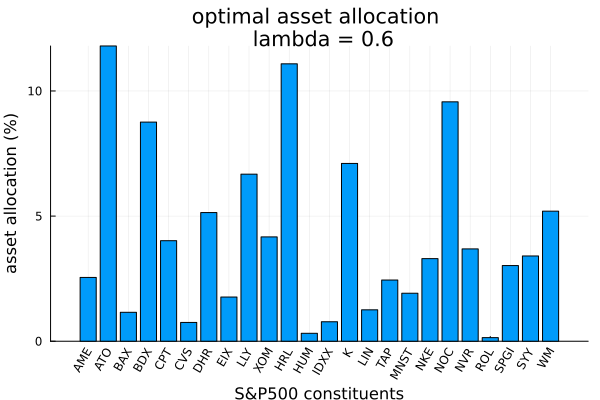

In [106]:
ac

## Risk-adjusted measure

In [107]:
# Lagrange multipliers associated to the constraint in the model
u_opt = dual.(C); 

# risk-adjusted probabilities
q = (1-sum(u_opt))*p + u_opt 

7552-element Vector{Float64}:
 0.00017359944701904567
 0.00017359944701904567
 9.415029447667281e-5
 0.00017359944701904567
 9.415029447667281e-5
 9.415029447667281e-5
 9.415029447667281e-5
 0.00017359944701904567
 9.415029447667281e-5
 0.00017359944701904567
 0.00017359944701904567
 0.00017359944701904567
 9.415029447667281e-5
 ⋮
 9.415029447667281e-5
 0.00017359944701904567
 0.00017359944701904567
 0.00017359944701904567
 0.00017359944701904567
 9.415029447667281e-5
 9.415029447667281e-5
 9.415029447667281e-5
 0.00017359944701904567
 0.00017359944701904567
 0.00017359944701904567
 0.00017359944701904567

In [108]:
opt_return = [sum(R[:,i].*z_opt) for i in 1:N];

In [109]:
#Pkg.add("Plots")
using Plots

sorted_adj = sortslices(hcat(opt_return,q), 
    dims = 1, by=col->(col[1], col[2]))

str = string(lambda)

plot_img = plot(
    sorted_adj[:,1], [(1:N)./N, cumsum(sorted_adj[:,2])], 
    title = "cdf portfolio returns \n lambda = $str", 
    linewidth=1, msw = 0, ms = 1.0,
    xlabel = "returns", yticks = 0:0.1:1.0,
    label = ["using original measure p" "using risk-adjusted measure q"]);

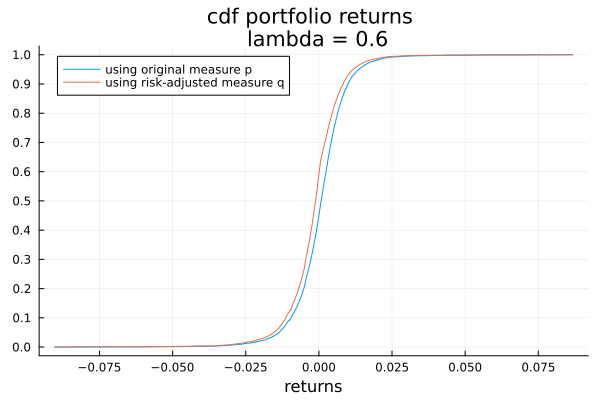

In [110]:
plot_img

In [111]:
fig_name = "cdf_returns-lambda=$str.pdf";
plot_lambda = plot(ac,plot_img,layout = (1,2));
savefig(plot_lambda,fig_name);

In [112]:
# To check that expected returns are the same at the minmax optimal (z_opt,q)
data[!,:"Expected_return"] = R*q
data_to_show2 = filter(:"opt_alloc" => a -> a != 0.0, data);
data_to_show2[!,[:"ticker",:"opt_alloc",:"Expected_return"]]

Row,ticker,opt_alloc,Expected_return
,String7,Float64,Float64
1,AME,0.0255022,-0.00143667
2,ATO,0.117975,-0.00143667
3,BAX,0.0115572,-0.00143667
4,BDX,0.0875689,-0.00143667
5,CPT,0.0401669,-0.00143667
6,CVS,0.00750724,-0.00143667
7,DHR,0.0513996,-0.00143667
8,EIX,0.017658,-0.00143667
9,LLY,0.0667633,-0.00143667


In [116]:
objective_value(m)

0.0014366703890340432

In [120]:
-z_opt'*R*q

0.001436670389034042

In [121]:
new_R=transpose(R)

7552×59 Matrix{Float64}:
  0.0114288    0.0877056   -0.023096     …   0.0377405     0.0
  0.0224728    0.0374576    0.0139216        0.0243921     0.0134229
  0.0          0.0325526    0.00459796       0.0           0.0132454
  0.0434853   -0.00356536  -0.00459796       0.0           0.0759864
  0.0618759    0.00711792   0.00917446       0.0355061    -0.0372719
 -0.0512933    0.0450685    0.00455548   …   0.0342891     0.0125789
 -0.0105826    0.00338375   0.0              0.0546587     0.0
  0.0          0.0200678   -0.00913198       0.0          -0.0253177
 -0.00557627  -0.0544351    0.0              0.0          -0.0392212
  0.0         -0.00701779  -0.00459796       0.0105817     0.0263174
  0.0317492   -0.0106197   -0.00461945   …   0.0104718    -0.013072
  0.0103625   -0.0325526    0.0             -0.0210534     0.0
 -0.0103625    0.0145991    0.0              0.0210534     0.013072
  ⋮                                      ⋱                
  0.0          0.00891254   0.000987128

In [124]:
import Pkg; Pkg.add("Ipopt")
import Ipopt
#import MultiObjectiveAlgorithms as MOA
import Statistics
r = vec(Statistics.mean(new_R; dims = 1))

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


59-element Vector{Float64}:
 0.0006364045767475711
 0.0006225584336427688
 0.00039417764008196216
 0.0003234101228294781
 0.0004957306506227045
 0.0005035446020554664
 0.00039017593676556164
 0.0006245972119676342
 0.0003866507512858863
 0.00011173341675155066
 0.0005047605038378359
 4.021885349587591e-5
 0.00043014369469513
 ⋮
 0.0004925837274598508
 0.0005898004029000386
 0.0002492569742095086
 0.0005790243443728791
 0.0006998068918192619
 0.00039806587578745803
 0.0005293155882235485
 0.0005550025041657008
 0.0002980363260640171
 0.00020247669613906793
 0.0004525655845764258
 0.00033709518564823483

In [125]:
Q = Statistics.cov(new_R)

59×59 Matrix{Float64}:
 0.000322076  0.000184816  8.94038e-5   …  9.57201e-5   0.000200693
 0.000184816  0.000866455  8.8038e-5       0.000120584  0.000427205
 8.94038e-5   8.8038e-5    0.000208721     6.5402e-5    9.98347e-5
 8.30196e-5   9.50739e-5   6.00758e-5      7.41919e-5   0.000104548
 7.56692e-5   9.86827e-5   5.29067e-5      7.36457e-5   0.000108611
 0.000149447  0.000268788  8.17833e-5   …  0.000112386  0.000277163
 0.000161     0.0002098    8.2094e-5       0.000105099  0.000227785
 0.000162536  0.000346334  8.62302e-5      0.00010915   0.000338061
 0.000121606  0.000138681  9.17579e-5      8.63064e-5   0.000163846
 0.000175411  0.000269452  8.26456e-5      0.000126268  0.000300162
 0.000145399  0.000394685  8.69337e-5   …  0.000107383  0.000325753
 0.000209867  0.000295355  0.000113731     0.000148688  0.000328181
 0.000142269  0.000158256  8.31734e-5      9.15316e-5   0.000180298
 ⋮                                      ⋱               
 0.000127912  0.000172352  8.36663e-5

In [127]:
model = Model(Ipopt.Optimizer)
set_silent(model)
@variable(model, y[1:59] >= 0)

@objective(model, Min, - r' * y  + y' * Q * y)
@constraint(model, sum(y) <= 1)
#@constraint(model, r' * x >= 50)
optimize!(model)
solution_summary(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



* Solver : Ipopt

* Status
  Result count       : 1
  Termination status : LOCALLY_SOLVED
  Message from the solver:
  "Solve_Succeeded"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Objective value    : -5.74512e-04
  Dual objective value : -3.71393e-04

* Work counters
  Solve time (sec)   : 3.71521e-02
  Barrier iterations : 10


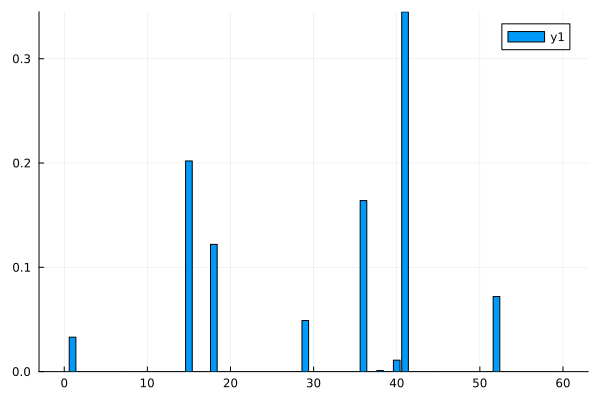

In [129]:
bar(round.(value.(y),digits=3))

In [ ]:
bar()